In [2]:
# Tarea Adaline

# María Alejandra Bonilla Díaz - 20251595002
# Youssef Alejandro Ortiz Vargas – 20251595004
# Álvaro Alejandro Zarabanda Gutiérrez - 20251595006

# ========== 1) Dependencias ==========
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Crear carpeta de trabajo para guardar resultados
OUTPUT = Path("results")
OUTPUT.mkdir(exist_ok=True)


In [3]:
# ========== 2) Cargar datos ==========
csv_path = "/content/training.csv"
df = pd.read_csv(csv_path)
# Validar
print(df.shape)
df.head()


(35, 6)


,Sample,x1,x2,x3,x4,d
0,1,0.4329,-1.3719,0.7022,-0.8535,1.0
1,2,0.3024,0.2286,0.8630,2.7909,-1.0
2,3,0.1349,-0.6445,1.0530,0.5687,-1.0
3,4,0.3374,-1.7163,0.3670,-0.6283,-1.0
4,5,1.1434,-0.0485,0.6637,1.2606,1.0


In [4]:
# ========== 3) Preparar matrices (X con bias, d) ==========
X = df[['x1','x2','x3','x4']].to_numpy()
# agregar bias x0 = -1 al inicio de cada vector
X_with_bias = np.hstack([ -np.ones((X.shape[0],1)), X ])  # shape: (N,5)
d = df['d'].to_numpy()   # target: -1 o +1


In [5]:
# ========== 4) Función de entrenamiento ADALINE (batch LMS) ==========
def train_adaline_batch(X, d, eta=0.0025, epsilon=1e-6, max_epochs=100000, init_weights=None, verbose=False):
    """
    X: matriz (N, M) donde M incluye bias (x0=-1)
    d: vector (N,)
    devuelve: w (M,), mse_history (list), epochs (int), w0_init (copy)
    Algoritmo: batch gradient descent sobre error cuadrático medio (MSE).
    """
    N, M = X.shape
    if init_weights is None:
        w = np.random.rand(M)  # en [0,1)
    else:
        w = init_weights.copy()
    w_init = w.copy()
    mse_history = []
    prev_mse = np.inf

    for epoch in range(1, max_epochs+1):
        u = X.dot(w)                # salida lineal
        e = d - u                   # error
        mse = np.mean(e**2)         # MSE (sin 1/2)
        mse_history.append(mse)

        # criterio de parada
        if abs(prev_mse - mse) < epsilon:
            if verbose:
                print(f"converged epoch {epoch}, mse {mse:.8e}")
            break
        prev_mse = mse

        # actualización batch (regla delta / LMS)
        # grad J = -2/N * X^T (d - u)  -> update w += eta * 2/N * X^T * e
        # pero usamos factor 1: w += eta * X.T.dot(e)  (absorbe constante en eta)
        w = w + eta * X.T.dot(e)

    return w, mse_history, epoch, w_init


In [7]:
# ========== 5) Ejecutar 5 entrenamientos y registrar resultados ==========
eta = 0.0025
epsilon = 1e-6

results = []
seeds = [None, None, None, None, None]
for t in range(5):
    seed = seeds[t]
    if seed is not None:
        np.random.seed(seed)
    init_w = np.random.rand(X_with_bias.shape[1])  # pesos iniciales en [0,1)
    w_final, mse_hist, epochs, w_init = train_adaline_batch(
        X_with_bias, d, eta=eta, epsilon=epsilon, max_epochs=100000, init_weights=init_w, verbose=False
    )
    results.append({
        'T': t+1,
        'seed': seed,
        'w0_init': w_init[0],
        'w1_init': w_init[1],
        'w2_init': w_init[2],
        'w3_init': w_init[3],
        'w4_init': w_init[4],
        'w0_final': w_final[0],
        'w1_final': w_final[1],
        'w2_final': w_final[2],
        'w3_final': w_final[3],
        'w4_final': w_final[4],
        'epochs': epochs,
        'mse_history': mse_hist
    })

# Guardar tabla de resumen
res_df = pd.DataFrame([{
    'T': r['T'],
    'seed': r['seed'],
    'w0_init': r['w0_init'],
    'w1_init': r['w1_init'],
    'w2_init': r['w2_init'],
    'w3_init': r['w3_init'],
    'w4_init': r['w4_init'],
    'w0_final': r['w0_final'],
    'w1_final': r['w1_final'],
    'w2_final': r['w2_final'],
    'w3_final': r['w3_final'],
    'w4_final': r['w4_final'],
    'epochs': r['epochs'],
} for r in results])
res_df.to_csv(OUTPUT / "resumen_entrenamientos.csv", index=False)
res_df

,T,seed,w0_init,w1_init,w2_init,w3_init,w4_init,w0_final,w1_final,w2_final,w3_final,w4_final,epochs
0,1,None,0.663391,0.915553,0.279289,0.857880,0.376355,-0.767091,1.387811,0.924896,0.021177,-0.774767,841
1,2,None,0.862266,0.653307,0.976938,0.739608,0.177021,-0.767124,1.387856,0.924963,0.021232,-0.774808,820
2,3,None,0.090358,0.061568,0.079440,0.712800,0.493233,-0.767119,1.387645,0.924691,0.020815,-0.774654,809
3,4,None,0.460461,0.495772,0.979252,0.315771,0.024875,-0.767056,1.387677,0.924713,0.020944,-0.774661,748
4,5,None,0.180725,0.286885,0.881290,0.941362,0.815758,-0.767011,1.387775,0.924827,0.021187,-0.774722,802


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

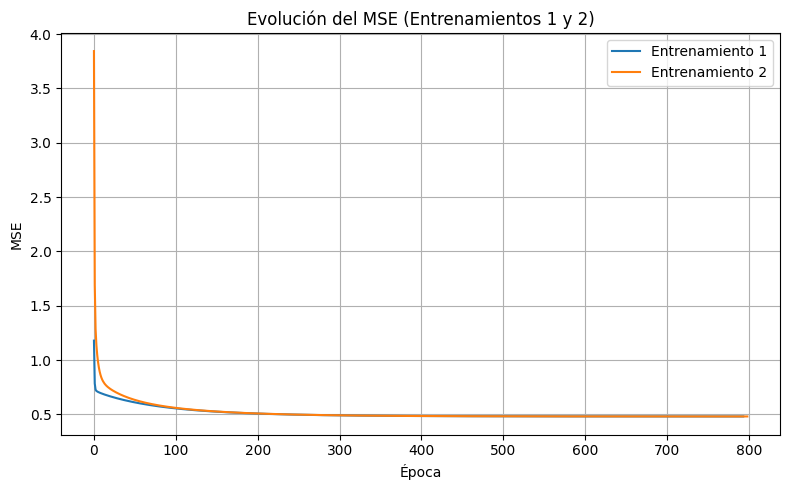

In [ ]:
# ========== 6) Gráfica ECM para los dos primeros entrenamientos ==========
mse1 = results[0]['mse_history']
mse2 = results[1]['mse_history']

plt.figure(figsize=(8,5))
plt.plot(mse1, label='Entrenamiento 1')
plt.plot(mse2, label='Entrenamiento 2')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.title('Evolución del MSE (Entrenamientos 1 y 2)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(OUTPUT / "mse_T1_T2.png", dpi=200)
plt.show()


In [ ]:
# ========== 7) Clasificación de la tabla del punto 4 (usar los 5 entrenamientos) ==========
class_path = "/content/to_classify.csv"
to_classify = pd.read_csv(class_path)    # columnas x1,x2,x3,x4
Xc = to_classify[['x1','x2','x3','x4']].to_numpy()
Xc_bias = np.hstack([ -np.ones((Xc.shape[0],1)), Xc ])

# Generar predicciones con cada entrenamiento
pred_df = to_classify.copy()
for r in results:
    w = np.array([r['w0_final'], r['w1_final'], r['w2_final'], r['w3_final'], r['w4_final']])
    u = Xc_bias.dot(w)
    y = np.where(u >= 0, 1, -1)   # regla de decisión
    pred_df[f'y(T{r["T"]})'] = y

pred_df.to_csv(OUTPUT / "clasificaciones.csv", index=False)
pred_df


,Sample,x1,x2,x3,x4,y(T1),y(T2),y(T3),y(T4),y(T5)
0,1,0.9694,0.6909,0.4334,3.4965,1,1,1,1,1
1,2,0.5427,1.3832,0.6390,4.0352,-1,-1,-1,-1,-1
2,3,0.6081,-0.9196,0.5925,0.1016,1,1,1,1,1
3,4,-0.1618,0.4694,0.2030,3.0117,-1,-1,-1,-1,-1
4,5,0.1870,-0.2578,0.6124,1.7749,-1,-1,-1,-1,-1
5,6,0.4891,-0.5276,0.4378,0.6439,1,1,1,1,1
6,7,0.3777,2.0149,0.7423,3.3932,1,1,1,1,1
7,8,1.1498,-0.4067,0.2469,1.5866,1,1,1,1,1
8,9,0.9325,1.0950,1.0359,3.3591,1,1,1,1,1
9,10,0.5060,1.3317,0.9222,3.7174,-1,-1,-1,-1,-1
